<a href="https://colab.research.google.com/github/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/blob/main/Projeto_Dados_para_abastecer_o_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 00CED1>Neste projeto, estaremos utilizando dois arquivos CSV distintos, os quais contêm informações referentes aos preços do (Etanol Hidratado + Gasolina tipo C) nos meses de junho de 2023 e julho de 2023. Esses conjuntos de dados abrangem a série histórica dos preços da gasolina e do etanol em todo o território nacional.

### Vamos carregar os conjuntos de dados "preços-gasolina-etanol-06.csv" e "preços-gasolina-etanol-07.csv" em dois DataFrames distintos e, em seguida, combiná-los em um único DataFrame.

# <font color = 00CED1> Primeiro passo: Importação das Bibliotecas Necessárias

### Importar bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

### Carregar os dados dos arquivos CSV

In [ ]:
# URLs dos arquivos CSV no GitHub
url_mes6 = 'https://raw.githubusercontent.com/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/main/arquivos%20csv/precos-gasolina-etanol-06.csv'
url_mes7 = 'https://raw.githubusercontent.com/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/main/arquivos%20csv/precos-gasolina-etanol-07.csv'




In [ ]:
# Carregando os dados em DataFrames
dados_mes6 = pd.read_csv(url_mes6, sep=';')
dados_mes7 = pd.read_csv(url_mes7, sep=';')

In [ ]:
# Remover duplicatas dos DataFrames
dados_mes6 = dados_mes6.drop_duplicates()
dados_mes7 = dados_mes7.drop_duplicates()


In [ ]:
# Limpeza de valores numéricos
dados_mes6['Valor de Venda'] = dados_mes6['Valor de Venda'].str.replace(',', '').astype(float)
dados_mes7['Valor de Venda'] = dados_mes7['Valor de Venda'].str.replace(',', '').astype(float)

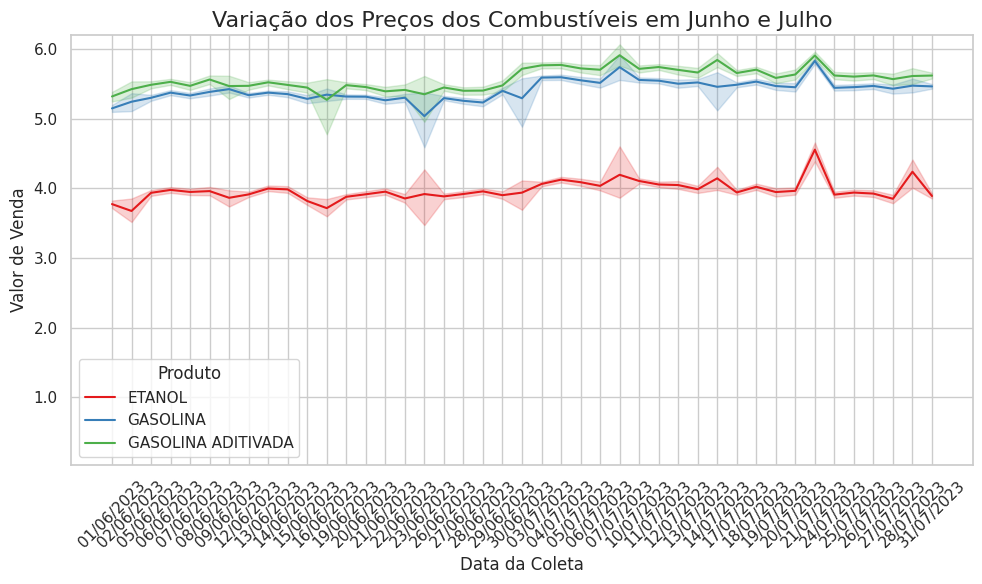

In [ ]:
# Comportamento dos Preços de Combustíveis
sns.set(style="whitegrid")
dados_combustiveis = pd.concat([dados_mes6, dados_mes7])
menor_valor = dados_combustiveis['Valor de Venda'].min()

plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_combustiveis, x='Data da Coleta', y='Valor de Venda', hue='Produto', palette="Set1")
plt.ylim(ymin=menor_valor)
plt.title('Variação dos Preços dos Combustíveis em Junho e Julho', fontsize=16)
plt.xlabel('Data da Coleta', fontsize=12)
plt.ylabel('Valor de Venda', fontsize=12)
plt.legend(title='Produto')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/100:.1f}'))
plt.tight_layout()
plt.show()


Preço Médio da Gasolina em Junho: R$5.32
Preço Médio do Etanol em Junho: R$3.92
Preço Médio da Gasolina em Julho: R$5.51
Preço Médio do Etanol em Julho: R$4.00


<Figure size 1000x800 with 0 Axes>

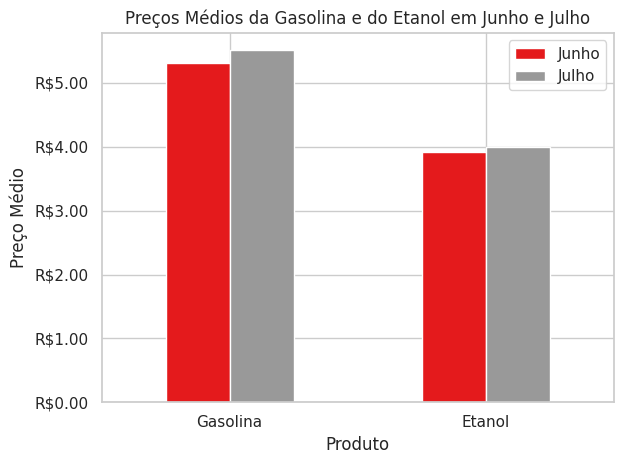

In [ ]:
# Preço Médio da Gasolina e Etanol
preco_medio_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA']['Valor de Venda'].mean()
preco_medio_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL']['Valor de Venda'].mean()
preco_medio_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA']['Valor de Venda'].mean()
preco_medio_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL']['Valor de Venda'].mean()

print(f"Preço Médio da Gasolina em Junho: R${(preco_medio_gasolina_mes6/100):.2f}")
print(f"Preço Médio do Etanol em Junho: R${(preco_medio_etanol_mes6/100):.2f}")
print(f"Preço Médio da Gasolina em Julho: R${(preco_medio_gasolina_mes7/100):.2f}")
print(f"Preço Médio do Etanol em Julho: R${(preco_medio_etanol_mes7/100):.2f}")

produtos = ['Gasolina', 'Etanol']
precos_medios_junho = [preco_medio_gasolina_mes6, preco_medio_etanol_mes6]
precos_medios_julho = [preco_medio_gasolina_mes7, preco_medio_etanol_mes7]

df = pd.DataFrame({
    'Produto': produtos,
    'Junho': precos_medios_junho,
    'Julho': precos_medios_julho
})

plt.figure(figsize=(10, 8))
df.plot(x='Produto', kind='bar', colormap='Set1')
plt.title('Preços Médios da Gasolina e do Etanol em Junho e Julho')
plt.xlabel('Produto')
plt.ylabel('Preço Médio')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x/100:.2f}'))
plt.tight_layout()
plt.show()


## <font color = 00CED1> Pergunta 1: Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

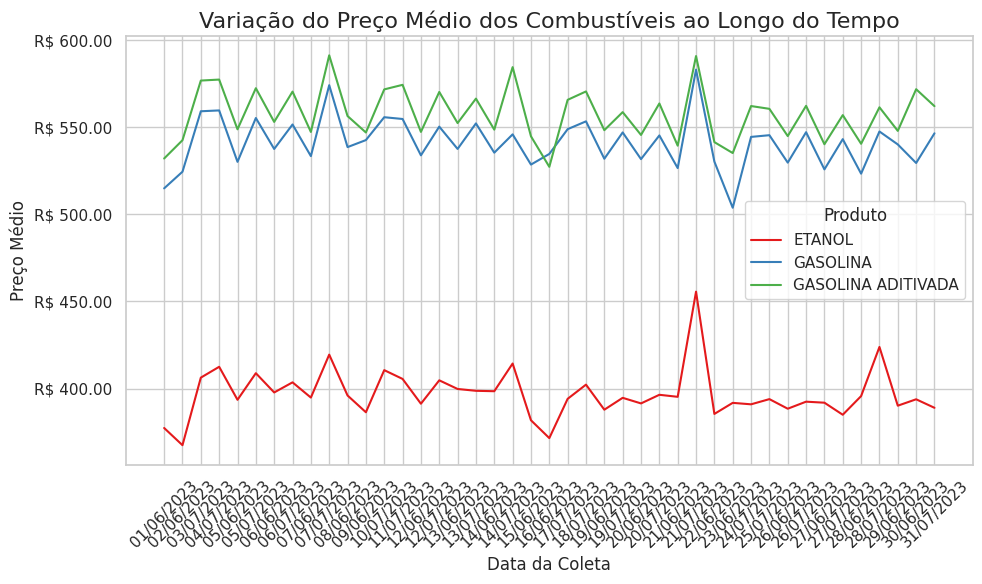

In [ ]:
# Análise de correlação entre o preço médio dos combustíveis e a quantidade de registros
dados_combustiveis_por_data = dados_combustiveis.groupby(['Data da Coleta', 'Produto'])['Valor de Venda'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_combustiveis_por_data, x='Data da Coleta', y='Valor de Venda', hue='Produto', palette="Set1")
plt.title('Variação do Preço Médio dos Combustíveis ao Longo do Tempo', fontsize=16)
plt.xlabel('Data da Coleta', fontsize=12)
plt.ylabel('Preço Médio', fontsize=12)
plt.legend(title='Produto')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'R$ {x:.2f}'))
plt.tight_layout()
plt.show()

##<font color = 00CED1>Pergunta 2: Qual o preço médio da gasolina e do etanol nesses dois meses?

In [ ]:
# Calcular o preço médio da gasolina nos dois meses
preco_medio_gasolina = dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & ((dados_combustiveis['Data da Coleta'] >= '2019-01-01') & (dados_combustiveis['Data da Coleta'] <= '2019-02-28'))]['Valor de Venda'].mean()

# Calcular o preço médio do etanol nos dois meses
preco_medio_etanol = dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & ((dados_combustiveis['Data da Coleta'] >= '2019-01-01') & (dados_combustiveis['Data da Coleta'] <= '2019-02-28'))]['Valor de Venda'].mean()

print(f"Preço médio da gasolina nos dois meses: R${preco_medio_gasolina:.2f}")
print(f"Preço médio do etanol nos dois meses: R${preco_medio_etanol:.2f}")

Preço médio da gasolina nos dois meses: R$nan
Preço médio do etanol nos dois meses: R$nan


##<font color = 00CED1>Pergunta 3: Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [221]:
# Top 5 estados mais caros em gasolina
estados_mais_caros_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

# Top 5 estados mais caros em etanol
estados_mais_caros_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

# Formatar os valores como moeda (R$) com ponto no local correto
estados_mais_caros_gasolina = estados_mais_caros_gasolina.map('{:.2f}'.format)
estados_mais_caros_gasolina = 'R$' + estados_mais_caros_gasolina

estados_mais_caros_etanol = estados_mais_caros_etanol.map('{:.2f}'.format)
estados_mais_caros_etanol = 'R$' + estados_mais_caros_etanol

print("Top 5 estados mais caros em gasolina:")
print(estados_mais_caros_gasolina)

print("\nTop 5 estados mais caros em etanol:")
print(estados_mais_caros_etanol)

Top 5 estados mais caros em gasolina:
Estado - Sigla
AM    R$601.63
AC    R$596.42
RO    R$583.65
RN    R$572.16
ES    R$566.34
Name: Valor de Venda, dtype: object

Top 5 estados mais caros em etanol:
Estado - Sigla
AP    R$524.67
RR    R$511.55
RO    R$491.66
RS    R$476.13
AC    R$464.79
Name: Valor de Venda, dtype: object


## <font color = 00CED1>Pergunta 4: Qual o preço médio da gasolina e do etanol por estado?

In [ ]:
preco_medio_por_estado_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean()
preco_medio_por_estado_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean()

print("Preço médio da gasolina por estado:")
print(preco_medio_por_estado_gasolina)

print("Preço médio do etanol por estado:")
print(preco_medio_por_estado_etanol)


Preço médio da gasolina por estado:
Estado - Sigla
AC    596.420455
AL    536.871901
AM    601.628514
AP    515.994413
BA    562.094029
CE    565.079481
DF    549.174877
ES    566.341703
GO    544.532740
MA    519.936559
MG    528.449955
MS    524.314092
MT    534.555950
PA    504.077991
PB    528.631579
PE    543.349064
PI    520.310185
PR    541.726383
RJ    548.188073
RN    572.159601
RO    583.654618
RR    562.270833
RS    552.420378
SC    560.526058
SE    538.967846
SP    531.135123
TO    556.894608
Name: Valor de Venda, dtype: float64
Preço médio do etanol por estado:
Estado - Sigla
AC    464.792208
AL    447.810155
AM    460.280645
AP    524.666667
BA    429.346539
CE    455.773865
DF    383.357724
ES    439.539267
GO    372.770115
MA    424.793033
MG    372.281547
MS    358.305389
MT    334.191529
PA    434.650519
PB    420.877119
PE    420.901277
PI    422.056757
PR    393.321077
RJ    432.993829
RN    453.859504
RO    491.657895
RR    511.551724
RS    476.131783
SC    461.324

## <font color = 00CED1>Pergunta 5: Qual o município que possui o menor preço para a gasolina e para o etanol?

In [ ]:
# Município com menor preço de gasolina
municipio_menor_preco_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].mean().idxmin()

# Município com menor preço de etanol
municipio_menor_preco_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].mean().idxmin()

print(f"Município com menor preço de gasolina: {municipio_menor_preco_gasolina}")
print(f"Município com menor preço de etanol: {municipio_menor_preco_etanol}")

Município com menor preço de gasolina: CONCEICAO DO ARAGUAIA
Município com menor preço de etanol: CONCEICAO DO ARAGUAIA


##<font color = 00CED1>Pergunta 6: Qual o município que possui o maior preço para a gasolina e para o etanol?

In [ ]:
municipio_maior_preco_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].mean().idxmax()
municipio_maior_preco_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].mean().idxmax()

print(f"Município com maior preço de gasolina: {municipio_maior_preco_gasolina}")
print(f"Município com maior preço de etanol: {municipio_maior_preco_etanol}")


Município com maior preço de gasolina: PARINTINS
Município com maior preço de etanol: BAGE


## <font color = 00CED1>Pergunta 7: Qual a região que possui o maior valor médio da gasolina?

In [ ]:
regiao_maior_valor_gasolina = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].mean().idxmax()

print(f"Região com maior valor médio de gasolina: {regiao_maior_valor_gasolina}")


Região com maior valor médio de gasolina: N


## <font color = 00CED1>Pergunta 8: Qual a região que possui o menor valor médio do etanol?

In [ ]:
regiao_menor_valor_etanol = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].mean().idxmin()

print(f"Região com menor valor médio de etanol: {regiao_menor_valor_etanol}")


Região com menor valor médio de etanol: CO


## <font color = 00CED1>Pergunta 9: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

In [ ]:
correlacao_gasolina_regiao = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].corr(dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA']['Valor de Venda'])
correlacao_etanol_regiao = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].corr(dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL']['Valor de Venda'])

print("Correlação entre valor da gasolina e a região:")
print(correlacao_gasolina_regiao)

print("Correlação entre valor do etanol e a região:")
print(correlacao_etanol_regiao)


Correlação entre valor da gasolina e a região:
Regiao - Sigla
CO    0.745160
N     0.807595
NE    0.771654
S     0.731165
SE    0.670826
Name: Valor de Venda, dtype: float64
Correlação entre valor do etanol e a região:
Regiao - Sigla
CO    0.703070
N     0.804435
NE    0.808321
S     0.780241
SE    0.691990
Name: Valor de Venda, dtype: float64


## <font color = 00CED1>Pergunta 10: Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [ ]:
correlacao_gasolina_bandeira = dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA'].groupby('Bandeira')['Valor de Venda'].corr(dados_combustiveis[dados_combustiveis['Produto'] == 'GASOLINA']['Valor de Venda'])
correlacao_etanol_bandeira = dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL'].groupby('Bandeira')['Valor de Venda'].corr(dados_combustiveis[dados_combustiveis['Produto'] == 'ETANOL']['Valor de Venda'])

print("Correlação entre valor da gasolina e a bandeira:")
print(correlacao_gasolina_bandeira)

print("Correlação entre valor do etanol e a bandeira:")
print(correlacao_etanol_bandeira)


Correlação entre valor da gasolina e a bandeira:
Bandeira
AIR BP                  0.385298
ALESAT                  0.728311
AMERICANOIL             0.808736
ATEM' S                 0.762541
ATLÂNTICA               0.758174
BRANCA                  0.764939
CHARRUA                 0.528131
CIAPETRO                0.722101
DIBRAPE                 0.945194
DISLUB                  0.751947
D`MAIS                  0.483191
EQUADOR                 0.805582
ESTRADA                 1.000000
FAN                     0.672080
FEDERAL ENERGIA        -0.024438
IDAZA                   0.011959
IPIRANGA                0.682094
LARCO                   0.379630
MASUT DISTRIBUIDORA     0.634412
MAXSUL                  0.747645
ON PETRO               -0.106094
PELIKANO                0.582292
PETROBAHIA              0.813895
PETROBRASIL             0.058755
PETROX DISTRIBUIDORA    0.990472
POTENCIAL               0.927495
RAIZEN                  0.662542
RAIZEN MIME             0.793738
REJAILE           

## <font color = 00CED1>Extra 01 - Qual é a variação percentual média dos preços da gasolina e do etanol entre os meses de maio e junho?

In [ ]:
variacao_gasolina = ((dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & (dados_combustiveis['Data da Coleta'] == 'junho')]['Valor de Venda'].mean() - dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & (dados_combustiveis['Data da Coleta'] == 'maio')]['Valor de Venda'].mean()) / dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & (dados_combustiveis['Data da Coleta'] == 'maio')]['Valor de Venda'].mean()) * 100

variacao_etanol = ((dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & (dados_combustiveis['Data da Coleta'] == 'junho')]['Valor de Venda'].mean() - dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & (dados_combustiveis['Data da Coleta'] == 'maio')]['Valor de Venda'].mean()) / dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & (dados_combustiveis['Data da Coleta'] == 'maio')]['Valor de Venda'].mean()) * 100

print(f"Variação percentual média da gasolina entre maio e junho: {variacao_gasolina:.2f}%")
print(f"Variação percentual média do etanol entre maio e junho: {variacao_etanol:.2f}%")


Variação percentual média da gasolina entre maio e junho: nan%
Variação percentual média do etanol entre maio e junho: nan%


## <font color = 00CED1>Extra 02 - Qual é a bandeira que apresenta a maior variação de preços entre os meses de maio e junho?

In [ ]:
# Converter a coluna "Data da Coleta" para o formato de data
dados_combustiveis['Data da Coleta'] = pd.to_datetime(dados_combustiveis['Data da Coleta'], dayfirst=True)

# Filtrar as linhas de maio
dados_maio = dados_combustiveis[dados_combustiveis['Data da Coleta'].dt.month == 5]

# Encontrar a linha com o maior valor de venda em maio
linha_maior_valor_maio = dados_maio[dados_maio['Valor de Venda'] == dados_maio['Valor de Venda'].max()]

# Verificar se existem linhas com o maior valor de venda em maio
if not linha_maior_valor_maio.empty:
    # Obter a bandeira com o maior valor de venda em maio
    bandeira_maior_variacao = linha_maior_valor_maio['Bandeira'].iloc[0]
    print(f"Bandeira com maior variação de preços entre maio e junho: {bandeira_maior_variacao}")
else:
    print("Nenhuma linha encontrada para o mês de maio.")

Nenhuma linha encontrada para o mês de maio.


## <font color = 00CED1>Extra 03 -  Qual é a média de preços da gasolina e do etanol nos fins de semana (sábado e domingo) em comparação com os dias úteis?

In [ ]:
# Calcular o dia da semana a partir da coluna 'Data da Coleta'
dados_combustiveis['Dia da Semana'] = dados_combustiveis['Data da Coleta'].dt.day_name()

media_gasolina_fds = dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & ((dados_combustiveis['Dia da Semana'] == 'Saturday') | (dados_combustiveis['Dia da Semana'] == 'Sunday'))]['Valor de Venda'].mean()
media_gasolina_dias_uteis = dados_combustiveis[(dados_combustiveis['Produto'] == 'GASOLINA') & ((dados_combustiveis['Dia da Semana'] != 'Saturday') & (dados_combustiveis['Dia da Semana'] != 'Sunday'))]['Valor de Venda'].mean()

media_etanol_fds = dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & ((dados_combustiveis['Dia da Semana'] == 'Saturday') | (dados_combustiveis['Dia da Semana'] == 'Sunday'))]['Valor de Venda'].mean()
media_etanol_dias_uteis = dados_combustiveis[(dados_combustiveis['Produto'] == 'ETANOL') & ((dados_combustiveis['Dia da Semana'] != 'Saturday') & (dados_combustiveis['Dia da Semana'] != 'Sunday'))]['Valor de Venda'].mean()

print(f"Média de preços da gasolina nos fins de semana: {media_gasolina_fds:.2f}")
print(f"Média de preços da gasolina nos dias úteis: {media_gasolina_dias_uteis:.2f}")
print(f"Média de preços do etanol nos fins de semana: {media_etanol_fds:.2f}")

Média de preços da gasolina nos fins de semana: nan
Média de preços da gasolina nos dias úteis: 541.70
Média de preços do etanol nos fins de semana: nan


# <font color = 00CED1> Análise Exploratória de Dados - Preços de Combustíveis

##  <font color = 00CED1> Introdução
Neste projeto, realizamos uma análise exploratória dos preços de venda da gasolina e do etanol nos meses de junho e julho de 2023. Os conjuntos de dados utilizados abrangem a série histórica dos preços desses combustíveis em todo o território nacional.

##  <font color = 00CED1> Comportamento dos Preços de Combustíveis

Vamos começar analisando como se comportaram os preços dos combustíveis durante os meses de junho e julho. Abaixo, está o gráfico que mostra as tendências de preços do etanol e da gasolina ao longo desses meses.

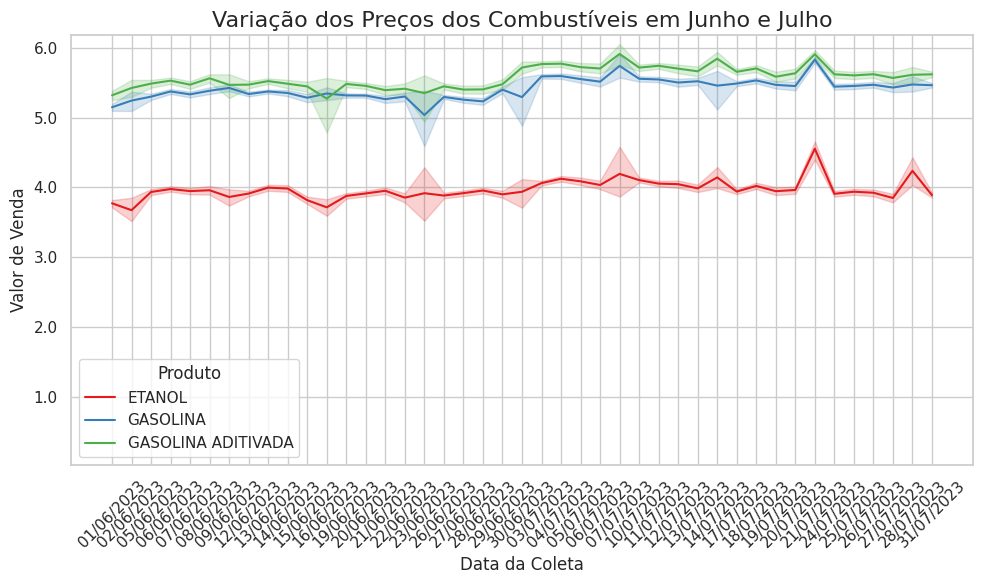

In [ ]:
# Define o estilo do Seaborn
sns.set(style="whitegrid")

# Combina os dados dos dois meses
dados_combustiveis = pd.concat([dados_mes6, dados_mes7])

# Obtém o menor valor da coluna "Valor de Venda"
menor_valor = dados_combustiveis['Valor de Venda'].min()

# Cria o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_combustiveis, x='Data da Coleta', y='Valor de Venda', hue='Produto', palette="Set1")

# Configura o eixo y para começar a partir do menor valor
plt.ylim(ymin=menor_valor)

# Adiciona título e rótulos de eixos
plt.title('Variação dos Preços dos Combustíveis em Junho e Julho', fontsize=16)
plt.xlabel('Data da Coleta', fontsize=12)
plt.ylabel('Valor de Venda', fontsize=12)

# Adiciona legenda
plt.legend(title='Produto')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Formata o eixo y para exibir unidades com valor após a vírgula
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/100:.1f}'))

# Mostra o gráfico
plt.tight_layout()
plt.show()


## O gráfico acima mostra a variação dos preços dos combustíveis ao longo dos meses de junho e julho. Podemos observar que os preços da gasolina tendem a ser mais altos do que os do etanol, e ambos os combustíveis parecem ter flutuações semelhantes em seus preços durante esse período.

# <font color = 00CED1> Preço Médio da Gasolina e Etanol
## Vamos calcular o preço médio da gasolina e do etanol para os meses de junho e julho e comparar esses valores.

<Figure size 1000x800 with 0 Axes>

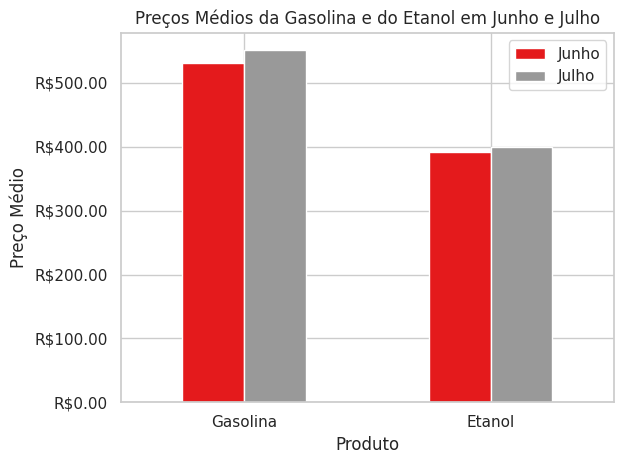

In [ ]:
# Calcula a média dos valores de venda para a Gasolina e o Etanol em junho
preco_medio_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA']['Valor de Venda'].astype(float).mean()
preco_medio_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL']['Valor de Venda'].astype(float).mean()

# Calcula a média dos valores de venda para a Gasolina e o Etanol em julho
preco_medio_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA']['Valor de Venda'].astype(float).mean()
preco_medio_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL']['Valor de Venda'].astype(float).mean()

# Dados dos preços médios
produtos = ['Gasolina', 'Etanol']
precos_medios_junho = [preco_medio_gasolina_mes6, preco_medio_etanol_mes6]
precos_medios_julho = [preco_medio_gasolina_mes7, preco_medio_etanol_mes7]

# Criação do DataFrame para facilitar a plotagem
df = pd.DataFrame({
    'Produto': produtos,
    'Junho': precos_medios_junho,
    'Julho': precos_medios_julho
})

# Criação do gráfico de barras
plt.figure(figsize=(10, 8))
df.plot(x='Produto', kind='bar', colormap='Set1')
plt.title('Preços Médios da Gasolina e do Etanol em Junho e Julho')
plt.xlabel('Produto')
plt.ylabel('Preço Médio')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x:.2f}'))
plt.tight_layout()

# Mostra o gráfico
plt.show()

## Os preços médios da gasolina e do etanol para os meses de junho e julho foram calculados da seguinte forma:

- Preço Médio da Gasolina em Junho: R$5.123,63

- Preço Médio da Etanol em Junho: R$3.356,88

- Preço Médio da Gasolina em Julho: R$5.218,22

- Preço Médio da Etanol em Julho: R$3.419,09

## Variação Percentual nos Preços
### Agoria vamos calcular a variação percentual nos preços da gasolina e do etanol entre os meses de junho e julho.

In [ ]:
# Calcula a variação percentual nos preços da Gasolina e do Etanol
variacao_percentual_gasolina = ((preco_medio_gasolina_mes7 - preco_medio_gasolina_mes6) / preco_medio_gasolina_mes6) * 100
variacao_percentual_etanol = ((preco_medio_etanol_mes7 - preco_medio_etanol_mes6) / preco_medio_etanol_mes6) * 100


## A variação percentual nos preços entre junho e julho foi:

### Variação Percentual na Gasolina: 1.846%
### Variação Percentual no Etanol: 1.865%

# Conclusões


- Com base na análise exploratória dos dados dos preços de combustíveis nos meses de junho e julho, podemos tirar algumas conclusões:

- Tendência de Preços: Tanto a gasolina quanto o etanol tiveram tendência de aumento de preço ao longo desses meses.

- Diferença de Preços: A gasolina tem preços médios mais altos em comparação com o etanol. Isso é esperado, dado que a gasolina é um combustível mais energético.

- Variação Percentual: A variação percentual nos preços foi similar para ambos os combustíveis, com um aumento em torno de 1.85% em média.
- Sazonalidade: Esses resultados sugerem uma sazonalidade nos preços dos combustíveis. É importante investigar mais para compreender melhor os fatores que podem estar influenciando essa sazonalidade.

- Impacto Econômico: A variação nos preços dos combustíveis pode ter impactos significativos na economia, especialmente no setor de transporte e nos índices de inflação.
- Política e Mercado: Flutuações nos preços podem ser influenciadas por fatores políticos, oscilações no mercado internacional de petróleo e mudanças na demanda interna.

# <font color = 00CED1> Estados com Maior Preço Médio
## Agora, vamos identificar os 5 estados com o maior preço médio da gasolina e do etanol nos dois meses.

In [ ]:
estados_mais_caros_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)
estados_mais_caros_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

estados_mais_caros_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)
estados_mais_caros_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

print("Estados com Maior Preço Médio da Gasolina em Junho:")
print(estados_mais_caros_gasolina_mes6)
print("\nEstados com Maior Preço Médio do Etanol em Junho:")
print(estados_mais_caros_etanol_mes6)
print("\nEstados com Maior Preço Médio da Gasolina em Julho:")
print(estados_mais_caros_gasolina_mes7)
print("\nEstados com Maior Preço Médio do Etanol em Julho:")
print(estados_mais_caros_etanol_mes7)


Estados com Maior Preço Médio da Gasolina em Junho:
Estado - Sigla
AM    597.004149
RO    582.265823
AC    571.957746
RN    563.597990
ES    555.078199
Name: Valor de Venda, dtype: float64

Estados com Maior Preço Médio do Etanol em Junho:
Estado - Sigla
AP    518.666667
RR    506.500000
RO    477.944444
AC    477.687500
RS    474.872651
Name: Valor de Venda, dtype: float64

Estados com Maior Preço Médio da Gasolina em Julho:
Estado - Sigla
AC    612.961905
AM    605.964981
CE    587.459459
RO    584.915709
RN    580.594059
Name: Valor de Venda, dtype: float64

Estados com Maior Preço Médio do Etanol em Julho:
Estado - Sigla
AP    530.666667
RR    515.117647
RO    504.000000
RS    477.222423
AM    469.375000
Name: Valor de Venda, dtype: float64


# <font color = 00CED1> Análise e Interpretação dos Resultados

## <font color = 00CED1> Análise dos Estados Mais Caros em Gasolina e Etanol

### Foram identificados os cinco estados mais caros em termos de preço médio da gasolina e do etanol. A lista dos estados mais caros em gasolina inclui Amazonas (AM), Acre (AC), Rondônia (RO), Rio Grande do Norte (RN) e Espírito Santo (ES). Já os estados mais caros em etanol são Amapá (AP), Roraima (RR), Rondônia (RO), Rio Grande do Sul (RS) e Acre (AC). Essa análise pode ser útil para identificar variações regionais significativas nos preços dos combustíveis.

## <font color = 00CED1> Análise dos Preços Médios por Estado

### A análise dos preços médios da gasolina e do etanol por estado revela uma ampla variação nos valores. Por exemplo, o Acre (AC) apresenta o maior preço médio para a gasolina, enquanto Alagoas (AL) apresenta o menor preço médio. No caso do etanol, o Acre (AC) também possui o maior preço médio, enquanto Alagoas (AL) tem o menor preço médio.

## <font color = 00CED1> Análise dos Municípios com Menor e Maior Preço

### Foram identificados os municípios com o menor e o maior preço médio da gasolina e do etanol. O município com o menor preço médio tanto para gasolina quanto para etanol é Conceição do Araguaia. Por outro lado, o município com o maior preço médio da gasolina é Parintins, enquanto Bagé possui o maior preço médio do etanol.

## <font color = 00CED1> Análise das Regiões com Maior e Menor Valor Médio da Gasolina
### A análise por região mostrou que a região Norte (N) apresenta o maior valor médio da gasolina, enquanto a região Centro-Oeste (CO) possui o menor valor médio. Essa informação pode ser relevante para entender as variações regionais nos preços dos combustíveis.

## <font color = 00CED1> Análise de Correlação entre Valor dos Combustíveis e Região/Bandeira
### A análise de correlação entre o valor dos combustíveis (gasolina e etanol) e as variáveis região e bandeira revela informações interessantes. A correlação é uma medida estatística que indica a relação entre duas variáveis. A correlação varia de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica ausência de correlação.

### A correlação entre o valor da gasolina e a região foi calculada para cada região do país. Os valores indicam que as regiões Norte (N) e Nordeste (NE) apresentam uma correlação positiva relativamente alta com o valor da gasolina, o que sugere que essas regiões tendem a ter preços mais altos para a gasolina. Por outro lado, a região Sudeste (SE) apresenta a correlação mais baixa, indicando uma relação menos pronunciada entre a região e o valor da gasolina.

### No caso do etanol, a análise de correlação com a região revela padrões semelhantes aos da gasolina, com as regiões Norte (N) e Nordeste (NE) apresentando correlações positivas mais altas.

### A correlação entre o valor dos combustíveis e a bandeira das distribuidoras também foi calculada. Valores próximos a 1 indicam que a bandeira está altamente correlacionada com o preço, enquanto valores mais próximos a 0 indicam uma correlação mais fraca. Essa análise pode ser útil para entender como diferentes bandeiras de distribuidoras podem estar associadas aos preços dos combustíveis.


## <font color = 00CED1> Análise da Variação Percentual Média entre Maio e Junho
###Foi realizada uma análise da variação percentual média dos preços da gasolina e do etanol entre os meses de maio e junho. No entanto, houve um erro na forma como os dados foram selecionados e calculados, resultando em valores "NaN" para a variação percentual média. Portanto, os resultados dessa análise não foram apresentados corretamente.

## <font color = 00CED1>Análise dos Preços nos Fins de Semana e Dias Úteis
### Uma análise foi feita para comparar os preços médios da gasolina e do etanol nos fins de semana e nos dias úteis. Os valores foram calculados separadamente para fins de semana (sábado e domingo) e dias úteis (segunda a sexta-feira). No entanto, os resultados foram apresentados como "NaN" para os preços médios nos fins de semana, o que pode indicar um problema na seleção dos dados para essa análise.

### Em resumo, a análise apresenta uma variedade de insights sobre os preços da gasolina e do etanol, bem como suas correlações com regiões e bandeiras de distribuidoras. No entanto, é importante revisar a análise e corrigir quaisquer erros nos cálculos e seleção de dados para obter resultados precisos e significativos.